## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from jupyterthemes import jtplot
jtplot.style()

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df_mouse_merge = mouse_metadata.merge(study_results, left_on = 'Mouse ID', right_on = 'Mouse ID')

# Display the data table for preview
df_mouse_merge


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_qty = len(pd.unique(df_mouse_merge['Mouse ID']))
mouse_qty

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = df_mouse_merge.loc[df_mouse_merge.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

print(duplicate_mouse)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
show_duplicates = df_mouse_merge.loc[df_mouse_merge['Mouse ID'] == 'g989']

show_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = df_mouse_merge.drop_duplicates().reset_index(drop=True)


clean_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2
1888,z969,Naftisol,Male,9,30,30,65.841013,3
1889,z969,Naftisol,Male,9,30,35,69.176246,4
1890,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
mouse_qty = len(pd.unique(clean_mouse['Mouse ID']))
mouse_qty

249

## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_stat = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_stat= clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var_stat = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv_stat = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_stat = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean': mean_stat, 'Median': median_stat, 'Variance': var_stat, 'Std. Dev.': stdv_stat, 'SEM': sem_stat})
summary_df

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_group = clean_mouse.groupby('Drug Regimen')
agg_summary = agg_group.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
agg_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

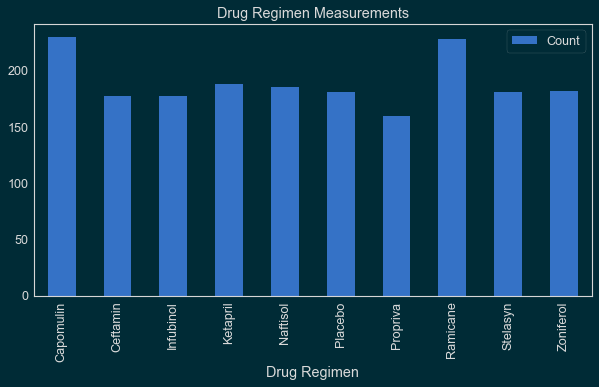

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_df = clean_mouse.groupby(['Drug Regimen']).count().reset_index()
regimen_data = regimen_df[['Drug Regimen', 'Mouse ID']].rename(columns={"Mouse ID": "Count"})

regimen_data = regimen_data.set_index('Drug Regimen')

regimen_data.plot(kind='bar', figsize=(10,5))

# Hide grid lines
plt.grid(b=None)

plt.title('Drug Regimen Measurements')
plt.show()

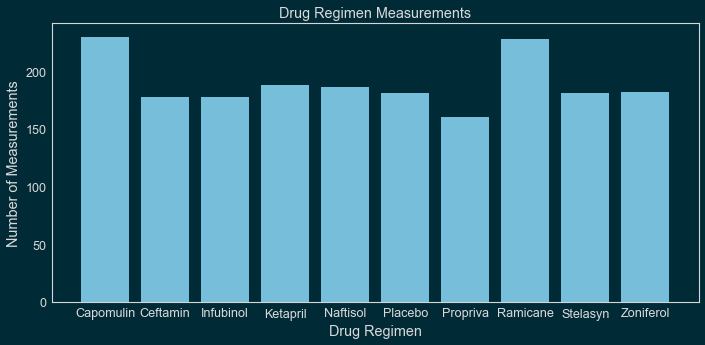

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# create drug regiment data set
regimen_list = summary_df.index.tolist()
x_axis = regimen_list

# create regimen count
regimen_count = (clean_mouse.groupby(['Drug Regimen'])['Mouse ID'].count()).tolist()

# format figure Size
fig = plt.figure(figsize =(10, 5))

# format title
plt.title('Drug Regimen Measurements')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Measurements')

# Hide grid lines
plt.grid(b=None)

# plot bar chart
plt.bar(x_axis, regimen_count, color='c', alpha=1, align='center')
plt.tight_layout()

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# create dataframe grouping unique players by Gender
gender_count = pd.DataFrame(clean_mouse.groupby('Sex')['Mouse ID'].nunique())

# rename column
gender_count = gender_count.rename(columns={'Mouse ID':'Total Count'})

# add column Percentage and calculate gender percentage
gender_count['Percentage Split'] = gender_count['Total Count'] / sum(gender_count['Total Count'])

# plot
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = gender_count.plot.pie(y='Total Count', figsize=(5, 5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")
plt.tight_layout()

NameError: name 'autotexts' is not defined

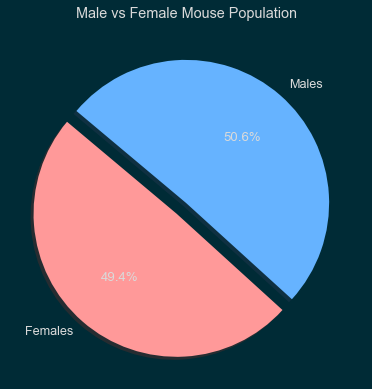

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Gender count female, male
gender_count = (clean_mouse.groupby(['Sex'])['Mouse ID'].count()).tolist()

# Labels for the sections of the pie chart
labels = ['Females', 'Males']
plt.title('Male vs Female Mouse Population')

# The values of each section of the pie chart
sizes = gender_count

# Colors each section of the pie chart
colors = ['#ff9999','#66b3ff']

# Tells matplotlib not to seperate the sections
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [25]:
# Display cleaned data
clean_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Sort values by Drug Regimen, Mouse ID, and Timepoint in ascending order
sorted_df = clean_mouse.sort_values(['Drug Regimen', 'Mouse ID', 'Timepoint'], ascending=True)
sorted_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0


In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = sorted_df.loc[sorted_df['Timepoint'] == 45]

#max_timepoint
max_timepoint.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [ ]:
capo_df = max_timepoint.loc[max_timepoint['Drug Regimen'] == 'Capomulin',:]
rami_df = max_timepoint.loc[max_timepoint['Drug Regimen'] == 'Ramicane',:]
infu_df = max_timepoint.loc[max_timepoint['Drug Regimen'] == 'Infubinol',:]
ceft_df = max_timepoint.loc[max_timepoint['Drug Regimen'] == 'Ceftamin',:]

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
